In [72]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [74]:
# Leer datos
# Leer el archivo CSV especificando que las comas dentro de comillas son parte del número
data = pd.read_csv('/content/gdrive/MyDrive/Universidad/2-2024/sis420/Datasets/MiningProcess_Flotation_Plant_Database.csv', delimiter=",", quotechar='"', encoding='latin-1')

# Reemplazar comas por puntos en todas las columnas numéricas
columnas_numericas = ["% Iron Feed", "% Silica Feed", "Starch Flow", "Amina Flow", "Ore Pulp Flow", "Ore Pulp pH", "Ore Pulp Density",
                      "Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow", "Flotation Column 03 Air Flow",
                      "Flotation Column 04 Air Flow", "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                      "Flotation Column 07 Air Flow", "Flotation Column 01 Level", "Flotation Column 02 Level",
                      "Flotation Column 03 Level", "Flotation Column 04 Level", "Flotation Column 05 Level",
                      "Flotation Column 06 Level", "Flotation Column 07 Level", "% Iron Concentrate", "% Silica Concentrate"]

# Reemplazar comas por puntos en las columnas seleccionadas
for columna in columnas_numericas:
    data[columna] = data[columna].str.replace(',', '.').astype(float)

In [75]:
X = data['% Silica Feed']
y = data['% Silica Concentrate']

m = y.size

In [76]:
def graficarDatos(x, y):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel('% Silica feed')
  pyplot.ylabel('% Silica Concentrade')

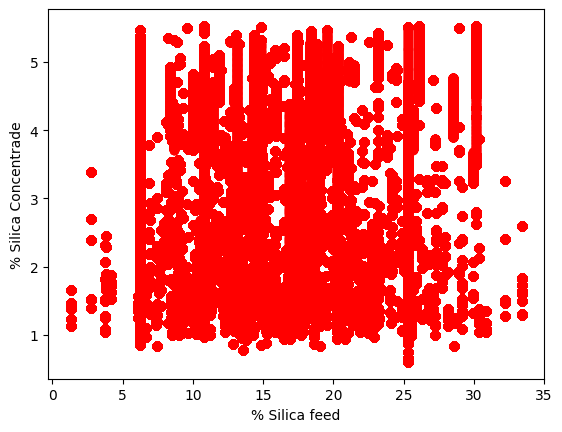

In [77]:
graficarDatos(X, y)

In [78]:
X = np.stack([np.ones(m), X], axis=1)

In [79]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [80]:
theta=np.array([0.1, 0.0])
JJ = calcularCosto(X, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 0. ] se obtiene un costo de: 3.112671877170263


In [81]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

In [82]:
theta = np.zeros(2)

num_ite = 200
alpha = 0.0003

theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [0.03007615 0.13113747]
con un costo de: 1.0292516297809555 


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


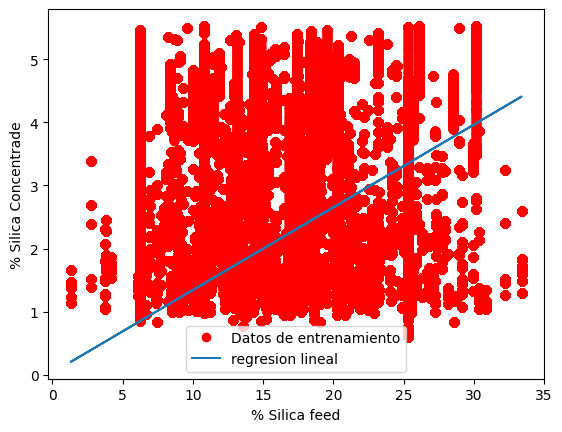

In [83]:
graficarDatos(X[:, 1], y)
pyplot.plot(X[:,1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [84]:
y_pred = np.dot([1, 1.3], theta)
print(y_pred)

0.2005548581299218


In [85]:
def realizar_predicciones(theta, num_predicciones=100):
    valores_x = np.linspace(min(X[:, 1]), max(X[:, 1]), num_predicciones)
    predicciones = np.dot(np.c_[np.ones(num_predicciones), valores_x], theta)  # Asegurarse de obtener un escalar
    return predicciones, valores_x

In [86]:
# Llamar a la función y obtener las predicciones
predicciones, valores_x = realizar_predicciones(theta)

# Imprimir las primeras 10 predicciones como ejemplo
print(predicciones)

[0.20186623 0.24437332 0.2868804  0.32938749 0.37189457 0.41440166
 0.45690874 0.49941583 0.54192291 0.58443    0.62693708 0.66944417
 0.71195125 0.75445834 0.79696542 0.83947251 0.88197959 0.92448668
 0.96699376 1.00950085 1.05200793 1.09451502 1.1370221  1.17952919
 1.22203627 1.26454336 1.30705044 1.34955753 1.39206461 1.4345717
 1.47707878 1.51958587 1.56209296 1.60460004 1.64710713 1.68961421
 1.7321213  1.77462838 1.81713547 1.85964255 1.90214964 1.94465672
 1.98716381 2.02967089 2.07217798 2.11468506 2.15719215 2.19969923
 2.24220632 2.2847134  2.32722049 2.36972757 2.41223466 2.45474174
 2.49724883 2.53975591 2.582263   2.62477008 2.66727717 2.70978425
 2.75229134 2.79479842 2.83730551 2.87981259 2.92231968 2.96482676
 3.00733385 3.04984093 3.09234802 3.1348551  3.17736219 3.21986927
 3.26237636 3.30488344 3.34739053 3.38989761 3.4324047  3.47491178
 3.51741887 3.55992595 3.60243304 3.64494012 3.68744721 3.72995429
 3.77246138 3.81496846 3.85747555 3.89998263 3.94248972 3.98499

In [87]:
# Leer el archivo CSV especificando que las comas dentro de comillas son parte del número
data = pd.read_csv('/content/gdrive/MyDrive/Universidad/2-2024/sis420/Datasets/MiningProcess_Flotation_Plant_Database.csv', delimiter=",", quotechar='"', encoding='latin-1')

# Reemplazar comas por puntos en todas las columnas numéricas
columnas_numericas = ["% Iron Feed", "% Silica Feed", "Starch Flow", "Amina Flow", "Ore Pulp Flow", "Ore Pulp pH", "Ore Pulp Density",
                      "Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow", "Flotation Column 03 Air Flow",
                      "Flotation Column 04 Air Flow", "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                      "Flotation Column 07 Air Flow", "Flotation Column 01 Level", "Flotation Column 02 Level",
                      "Flotation Column 03 Level", "Flotation Column 04 Level", "Flotation Column 05 Level",
                      "Flotation Column 06 Level", "Flotation Column 07 Level", "% Iron Concentrate", "% Silica Concentrate"]

# Reemplazar comas por puntos en las columnas seleccionadas
for columna in columnas_numericas:
    data[columna] = data[columna].str.replace(',', '.').astype(float)

# Verificar los primeros registros para asegurarse de que los cambios se han aplicado correctamente
print(data.head())

                  date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0  2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
1  2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2  2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
3  2017-03-10 01:00:00         55.2          16.98      3047.36     568.665   
4  2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        395.713      10.0664              1.74                       249.214   
1        397.383      10.0672              1.74                       249.719   
2        399.668      10.0680              1.74                       249.741   
3        397.939      10.0689              1.74                       249.917   
4        400.254      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  ...  

In [88]:
X = data['% Silica Feed'].values
y = data['% Silica Concentrate'].values
m = y.size
X = X.reshape(-1, 1)

In [89]:
def plotData(x, y):

    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('% Silica Concentrate')
    pyplot.xlabel('% Silica Feed')



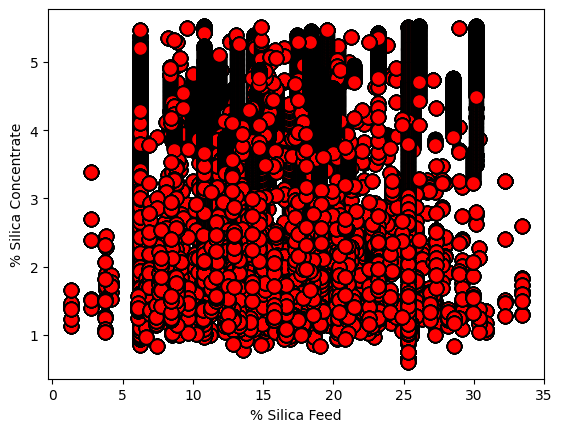

In [90]:
plotData(X, y)

In [91]:
X = np.concatenate([X, X * X], axis=1)

In [92]:
print(X)

[[ 16.98   288.3204]
 [ 16.98   288.3204]
 [ 16.98   288.3204]
 ...
 [ 23.2    538.24  ]
 [ 23.2    538.24  ]
 [ 23.2    538.24  ]]


In [93]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [94]:
X_norm, mu, sigma = featureNormalize(X)

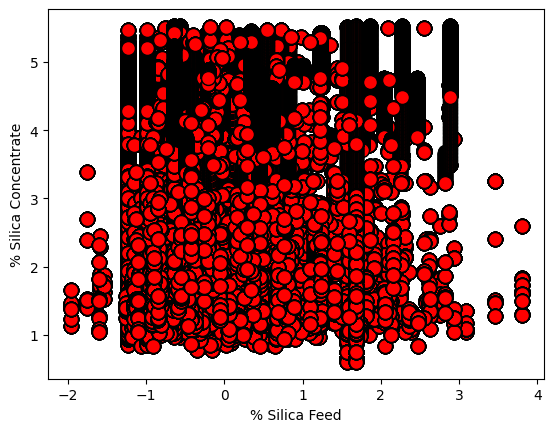

In [95]:
plotData(X_norm, y)

In [96]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [97]:
print(X)

[[1.         0.34202086 0.12134249]
 [1.         0.34202086 0.12134249]
 [1.         0.34202086 0.12134249]
 ...
 [1.         1.25572783 1.23191678]
 [1.         1.25572783 1.23191678]
 [1.         1.25572783 1.23191678]]


In [98]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J


In [99]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 2.21144169  0.07236107 -0.00286052]
Prediccion: $2


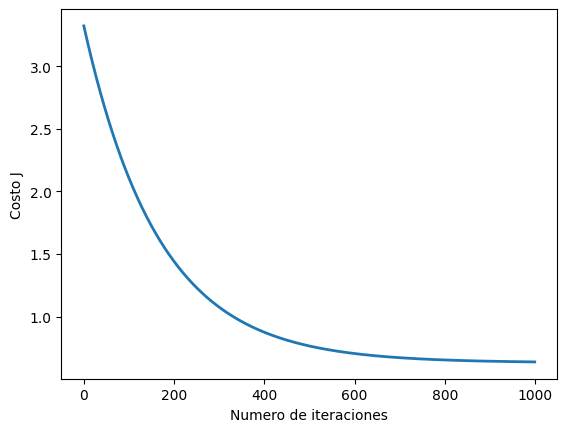

In [100]:
alpha = 0.003
num_iters = 1000
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
X_array = [1, 34, 1156]
X_array[1:3] = (X_array[1:3] - mu) / sigma
prediccion = np.dot(X_array, theta)
print('Prediccion: ${:.0f}'.format(prediccion))

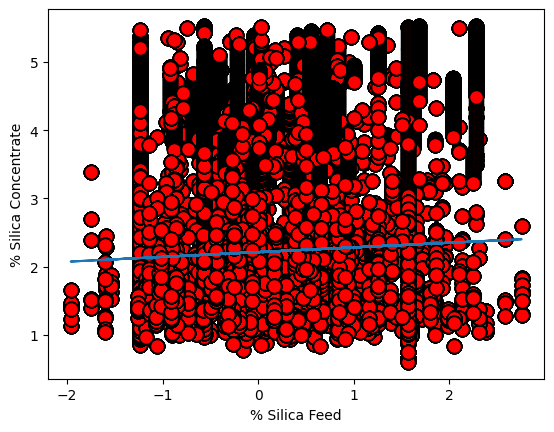

In [101]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [102]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [103]:
X_array[1:3]
print(np.dot(X_array, theta))

2.2967750908458933


In [104]:
# Función para realizar 100 predicciones
def realizar_100_predicciones(mu, sigma, theta):
    # Generar 100 valores de % Silica Feed
    X_pred = np.linspace(min(data['% Silica Feed']), max(data['% Silica Feed']), 100).reshape(-1, 1)
    X_pred_poly = np.concatenate([X_pred, X_pred ** 2], axis=1)
    X_pred_norm = (X_pred_poly - mu) / sigma
    X_pred_norm = np.concatenate([np.ones((X_pred_norm.shape[0], 1)), X_pred_norm], axis=1)
    predicciones = np.dot(X_pred_norm, theta)
    return X_pred, predicciones

In [105]:
X_pred, predicciones = realizar_100_predicciones(mu, sigma, theta)
print(predicciones)

[2.07291912 2.07635252 2.07978324 2.0832113  2.08663669 2.0900594
 2.09347945 2.09689682 2.10031152 2.10372355 2.10713291 2.1105396
 2.11394362 2.11734496 2.12074364 2.12413964 2.12753297 2.13092364
 2.13431163 2.13769695 2.14107959 2.14445957 2.14783688 2.15121151
 2.15458348 2.15795277 2.16131939 2.16468334 2.16804462 2.17140323
 2.17475917 2.17811243 2.18146303 2.18481095 2.18815621 2.19149879
 2.1948387  2.19817594 2.20151051 2.2048424  2.20817163 2.21149819
 2.21482207 2.21814328 2.22146182 2.2247777  2.2280909  2.23140142
 2.23470928 2.23801447 2.24131698 2.24461683 2.247914   2.2512085
 2.25450033 2.25778949 2.26107598 2.2643598  2.26764095 2.27091942
 2.27419523 2.27746836 2.28073882 2.28400661 2.28727173 2.29053418
 2.29379396 2.29705106 2.3003055  2.30355726 2.30680636 2.31005278
 2.31329653 2.31653761 2.31977602 2.32301176 2.32624482 2.32947522
 2.33270294 2.335928   2.33915038 2.34237009 2.34558713 2.3488015
 2.3520132  2.35522222 2.35842858 2.36163226 2.36483328 2.36803162

In [106]:
# Cargar datos
# Leer el archivo CSV especificando que las comas dentro de comillas son parte del número
data = pd.read_csv('/content/gdrive/MyDrive/Universidad/2-2024/sis420/Datasets/MiningProcess_Flotation_Plant_Database.csv', delimiter=",", quotechar='"', encoding='latin-1')

# Reemplazar comas por puntos en todas las columnas numéricas
columnas_numericas = ["% Iron Feed", "% Silica Feed", "Starch Flow", "Amina Flow", "Ore Pulp Flow", "Ore Pulp pH", "Ore Pulp Density",
                      "Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow", "Flotation Column 03 Air Flow",
                      "Flotation Column 04 Air Flow", "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                      "Flotation Column 07 Air Flow", "Flotation Column 01 Level", "Flotation Column 02 Level",
                      "Flotation Column 03 Level", "Flotation Column 04 Level", "Flotation Column 05 Level",
                      "Flotation Column 06 Level", "Flotation Column 07 Level", "% Iron Concentrate", "% Silica Concentrate"]

# Reemplazar comas por puntos en las columnas seleccionadas
for columna in columnas_numericas:
    data[columna] = data[columna].str.replace(',', '.').astype(float)
X = data['% Silica Feed'].values
y = data['% Silica Concentrate'].values
m = y.size
X = X.reshape(-1, 1)
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [107]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [108]:
theta = normalEqn(X, y);

print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));
X_array = [1, 20, 400]
prediccion = np.dot(X_array, theta)

print('Prediccion: {:.0f}'.format(prediccion))

Theta calculado a partir de la ecuación de la normal: [ 1.65181939  0.08794046 -0.00235058]
Prediccion: 2


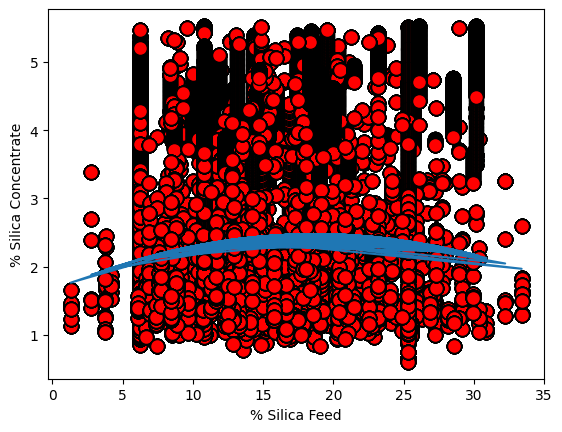

In [109]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [110]:
# Función para realizar 100 predicciones
def realizar_100_predicciones(theta):
    # Generar 100 valores de % Silica Feed
    X_pred = np.linspace(min(data['% Silica Feed']), max(data['% Silica Feed']), 100).reshape(-1, 1)
    X_pred_poly = np.concatenate([X_pred, X_pred ** 2], axis=1)
    X_pred_bias = np.concatenate([np.ones((X_pred_poly.shape[0], 1)), X_pred_poly], axis=1)
    predicciones = np.dot(X_pred_bias, theta)
    return X_pred, predicciones

In [111]:
# Llamada a la función para realizar 100 predicciones
X_pred, predicciones = realizar_100_predicciones(theta)

In [112]:
print(predicciones)

[1.76298755 1.7892495  1.8150175  1.84029156 1.86507168 1.88935786
 1.9131501  1.93644839 1.95925275 1.98156317 2.00337965 2.02470219
 2.04553078 2.06586544 2.08570616 2.10505293 2.12390577 2.14226466
 2.16012962 2.17750063 2.19437771 2.21076084 2.22665004 2.24204529
 2.2569466  2.27135398 2.28526741 2.2986869  2.31161245 2.32404406
 2.33598174 2.34742547 2.35837526 2.36883111 2.37879302 2.38826099
 2.39723501 2.4057151  2.41370125 2.42119346 2.42819173 2.43469606
 2.44070644 2.44622289 2.4512454  2.45577396 2.45980859 2.46334927
 2.46639602 2.46894882 2.47100769 2.47257261 2.47364359 2.47422064
 2.47430374 2.4738929  2.47298812 2.47158941 2.46969675 2.46731015
 2.46442961 2.46105513 2.45718671 2.45282435 2.44796805 2.44261781
 2.43677363 2.43043551 2.42360345 2.41627744 2.4084575  2.40014362
 2.39133579 2.38203403 2.37223833 2.36194868 2.3511651  2.33988757
 2.32811611 2.3158507  2.30309136 2.28983807 2.27609084 2.26184968
 2.24711457 2.23188552 2.21616253 2.19994561 2.18323474 2.1660